# Behavior Planning

## 1. Outline

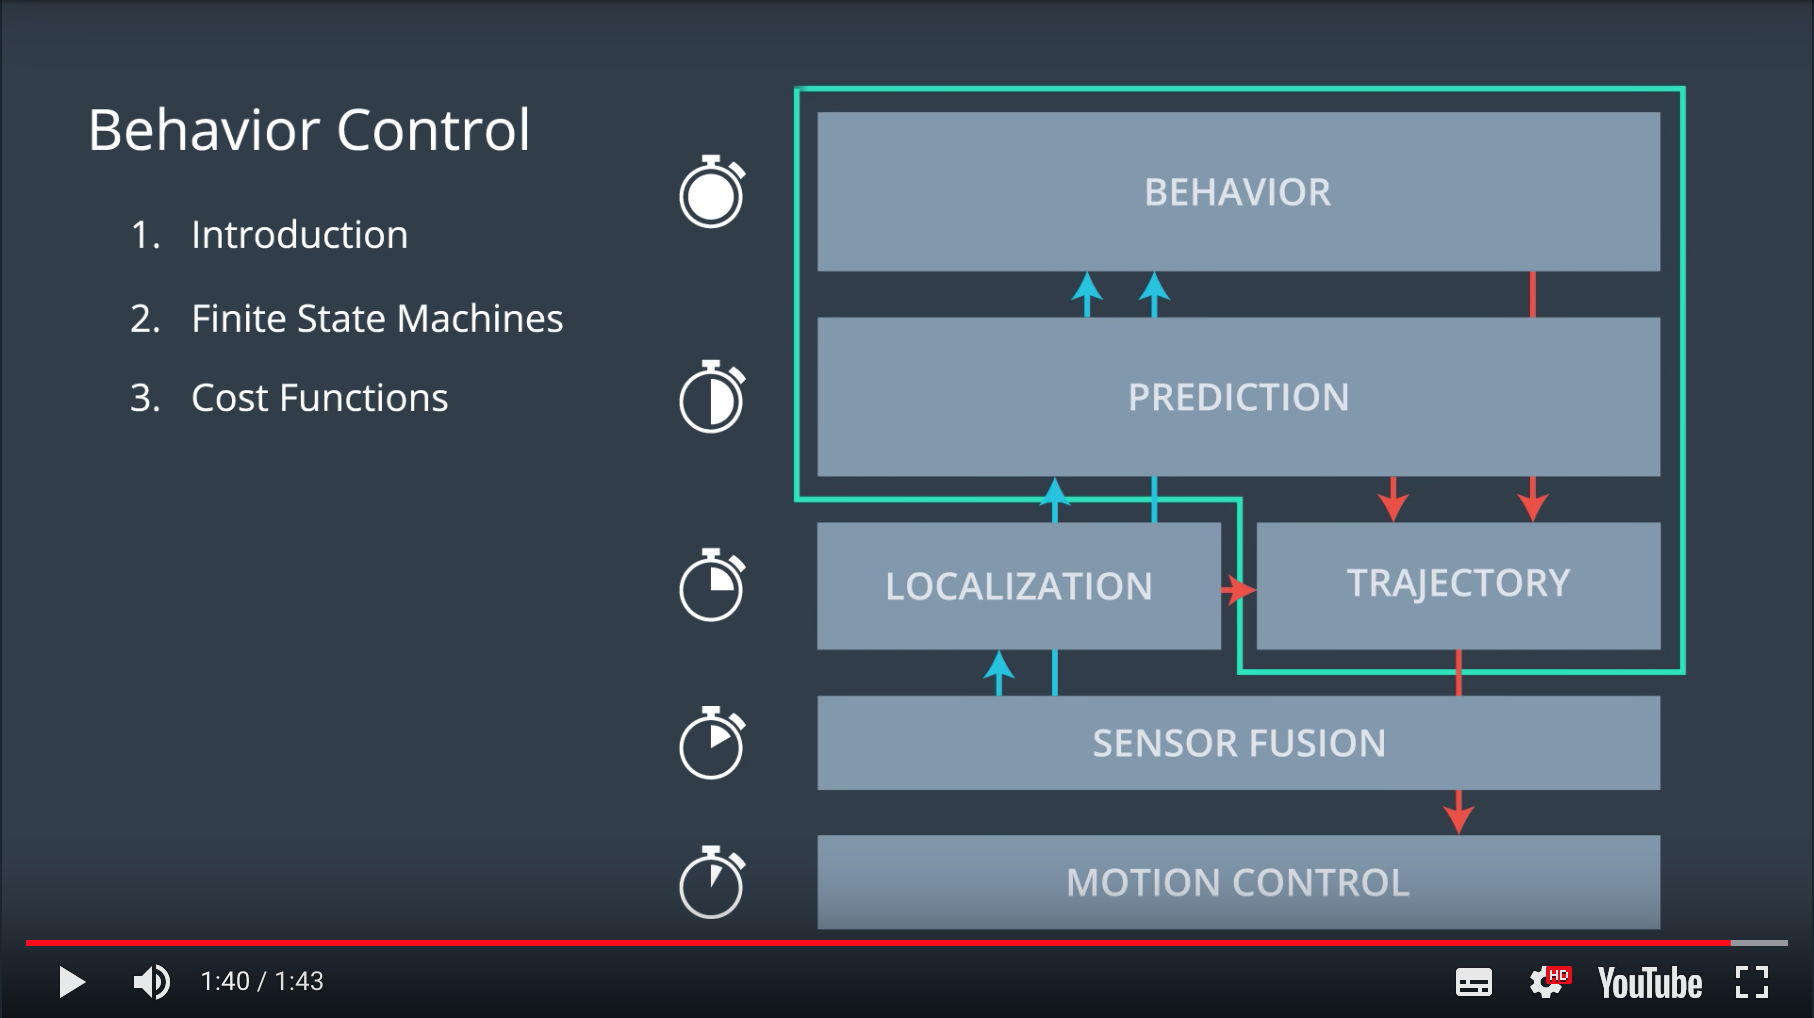

## 2. Understanding Output
It's possible to suggest a wide variety of behaviors by specifying only a few quantities. For example by specifying only a target lane, a target vehicle (to follow), a target speed, and a time to reach these targets, we can make suggestions as nuanced as "stay in your lane but get behind that vehicle in the right lane so that you can pass it when the gap gets big enough."

Look at the picture below and 5 potential `json` representations of output and see if you can match the `json` representation with the corresponding verbal suggestion.

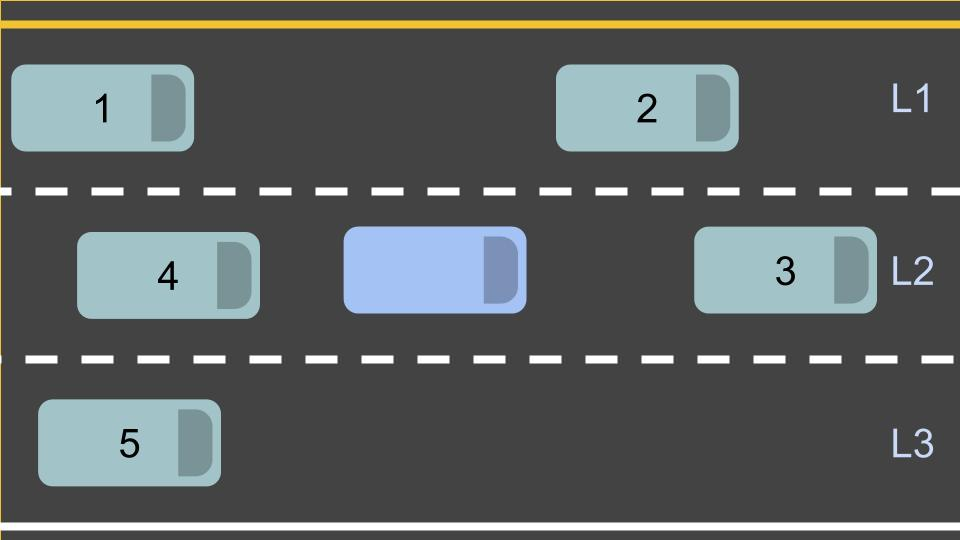

### Output A

"Just stay in your lane and keep following the car in front of you"

```json
{
    "target_lane_id" : 2,
    "target_leading_vehicle_id": 3,
    "target_speed" : null,
    "seconds_to_reach_target" : null,
}
```

### Output B

"Get in the right lane soon."

```json
{
    "target_lane_id" : 3,
    "target_leading_vehicle_id": null,
    "target_speed" : 20.0,
    "seconds_to_reach_target" : 5.0,
}
```

### Output C

"Whoa! This car we've been following is going too fast. Stop trying to follow it and just try to go the speed limit."

```json
{
    "target_lane_id" : 2,
    "target_leading_vehicle_id": null,
    "target_speed" : 15.0,
    "seconds_to_reach_target" : 10.0,
}
```

### Output D

"Let's pass this car! But first we have to match speeds with the car in the left lane. Stay in this lane but get behind that car in the left lane and match their speed."

```json
{
    "target_lane_id" : 2,
    "target_leading_vehicle_id": 2,
    "target_speed" : null,
    "seconds_to_reach_target" : 5.0,
}
```

### Output E

"Let's pass this car! Get in the left lane and follow that car"

```json
{
    "target_lane_id" : 1,
    "target_leading_vehicle_id": 2,
    "target_speed" : null,
    "seconds_to_reach_target" : 5.0,
}
```

## 3. The behavior Problem

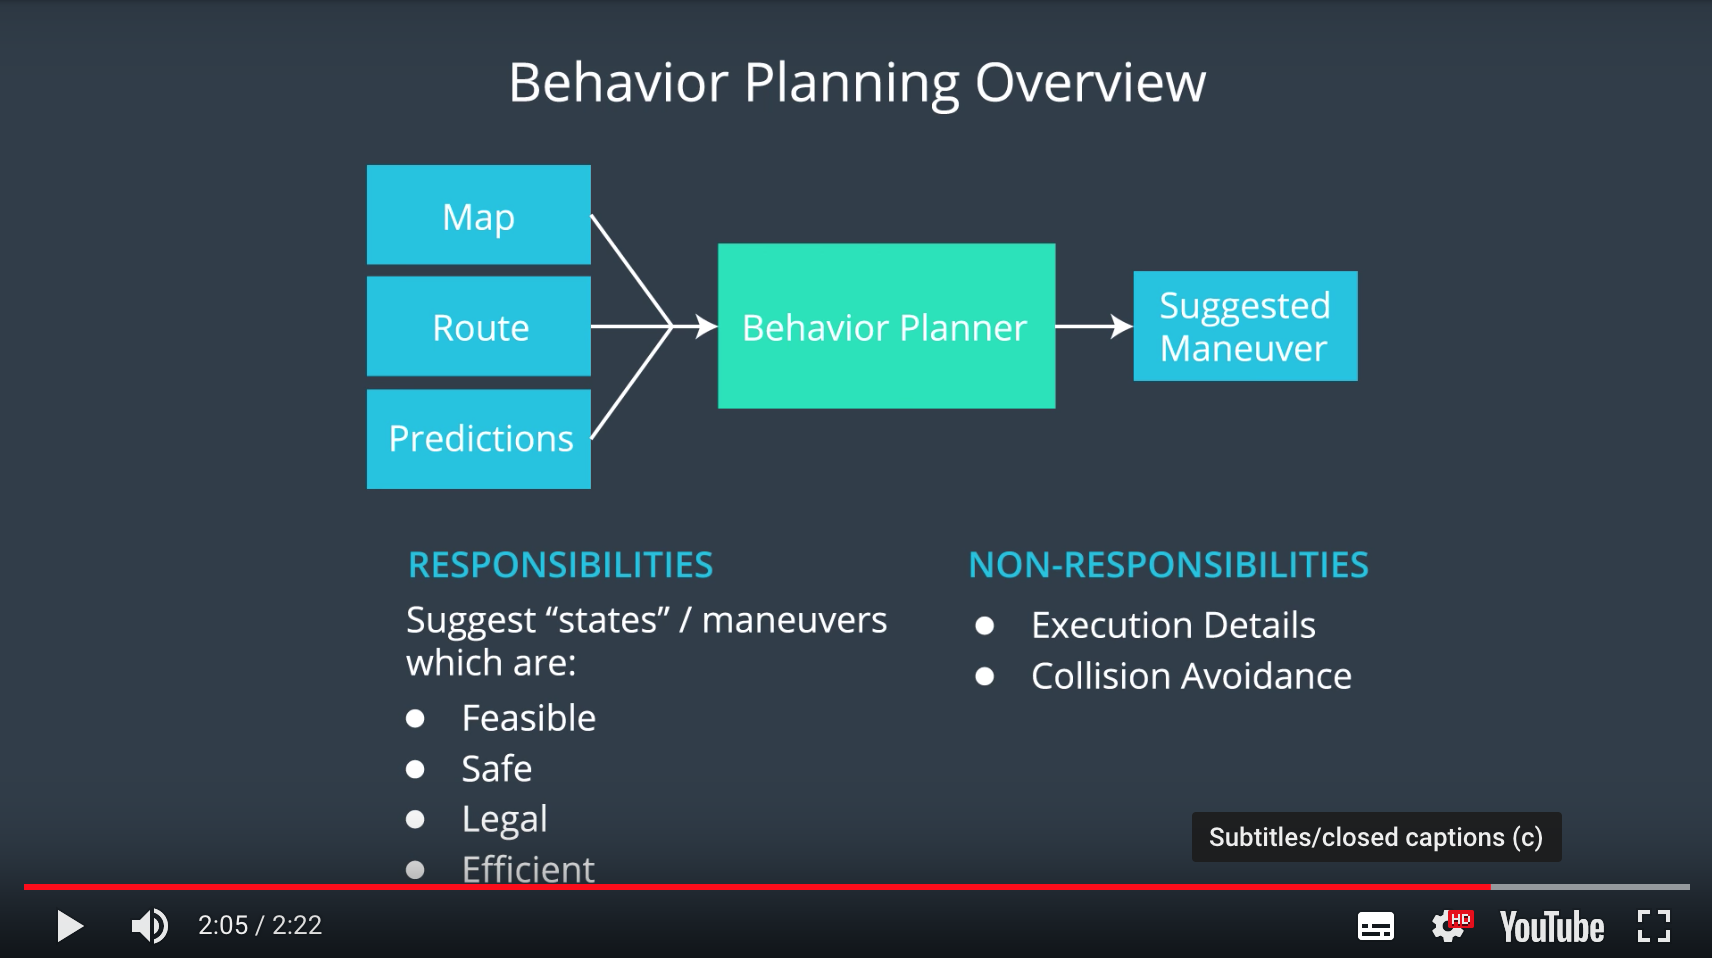

## 4. Finite State Machines

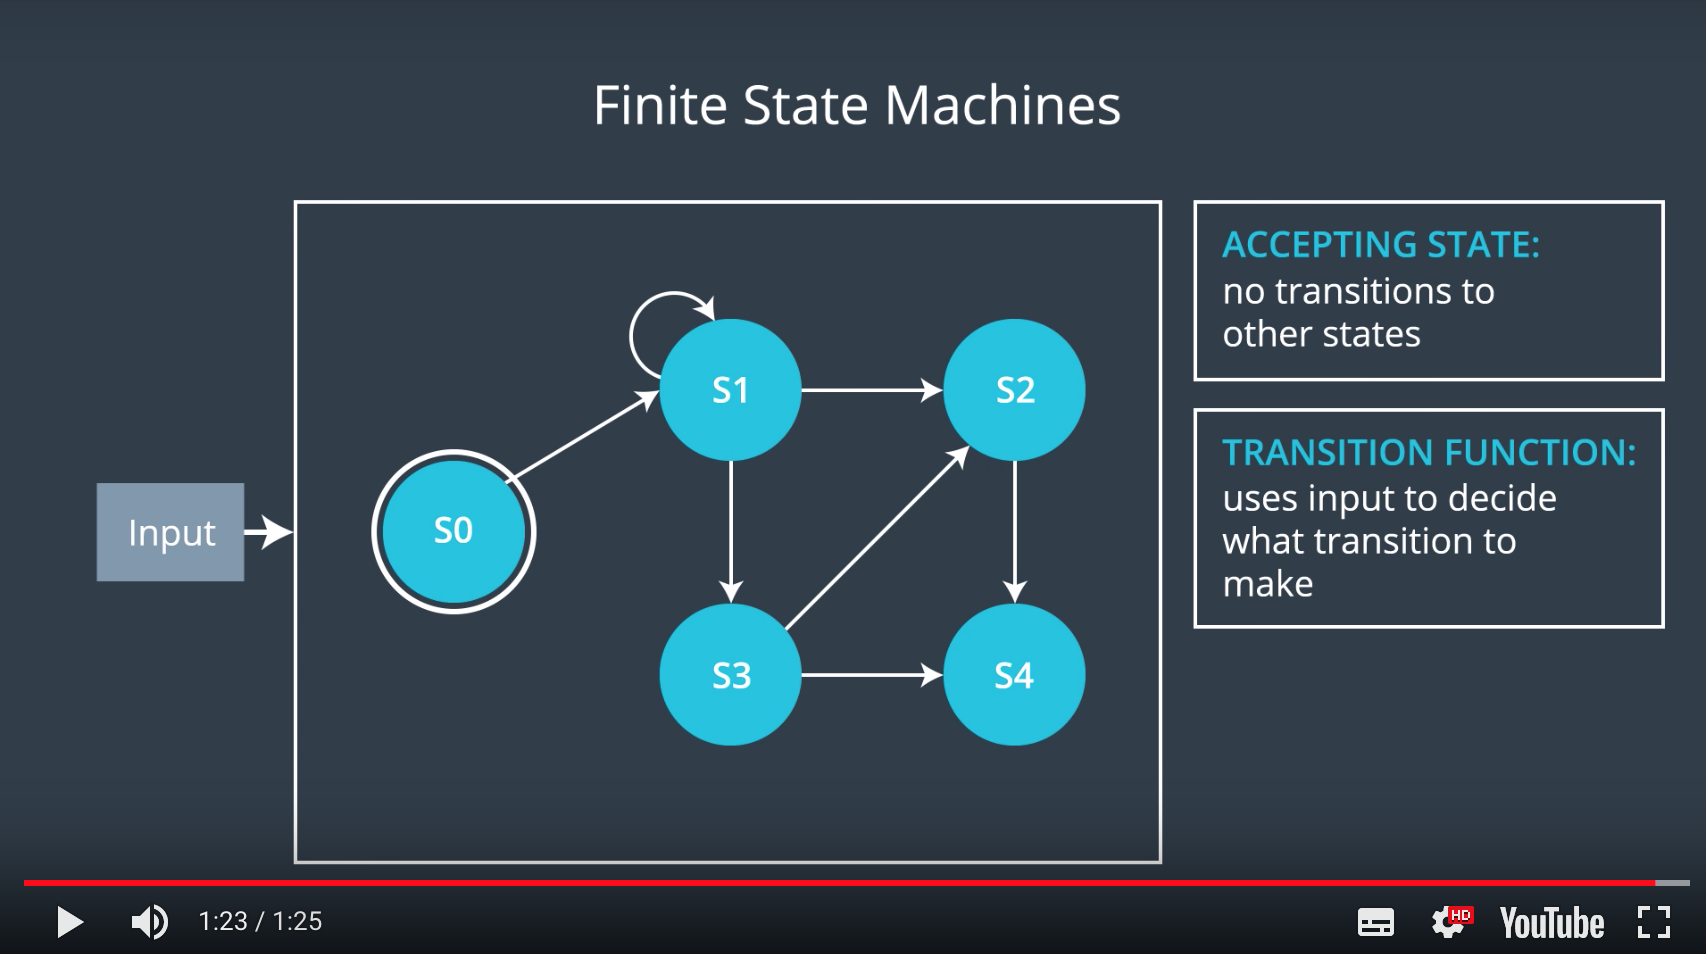

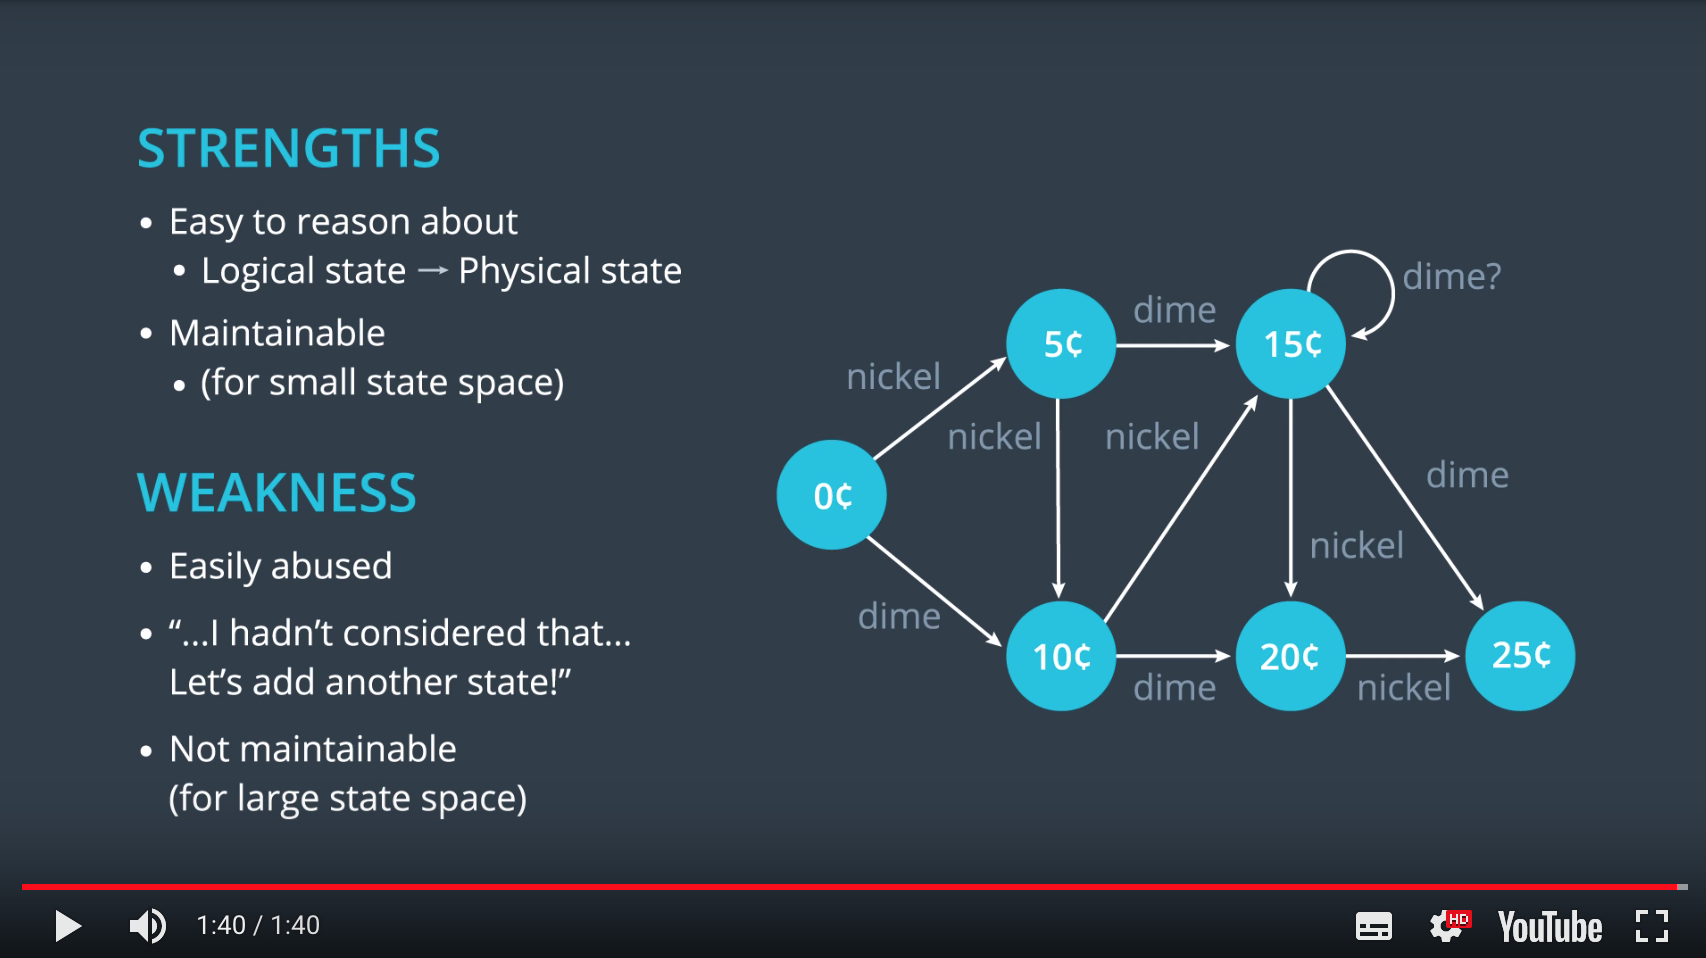

## 5. States for Self Driving Cars

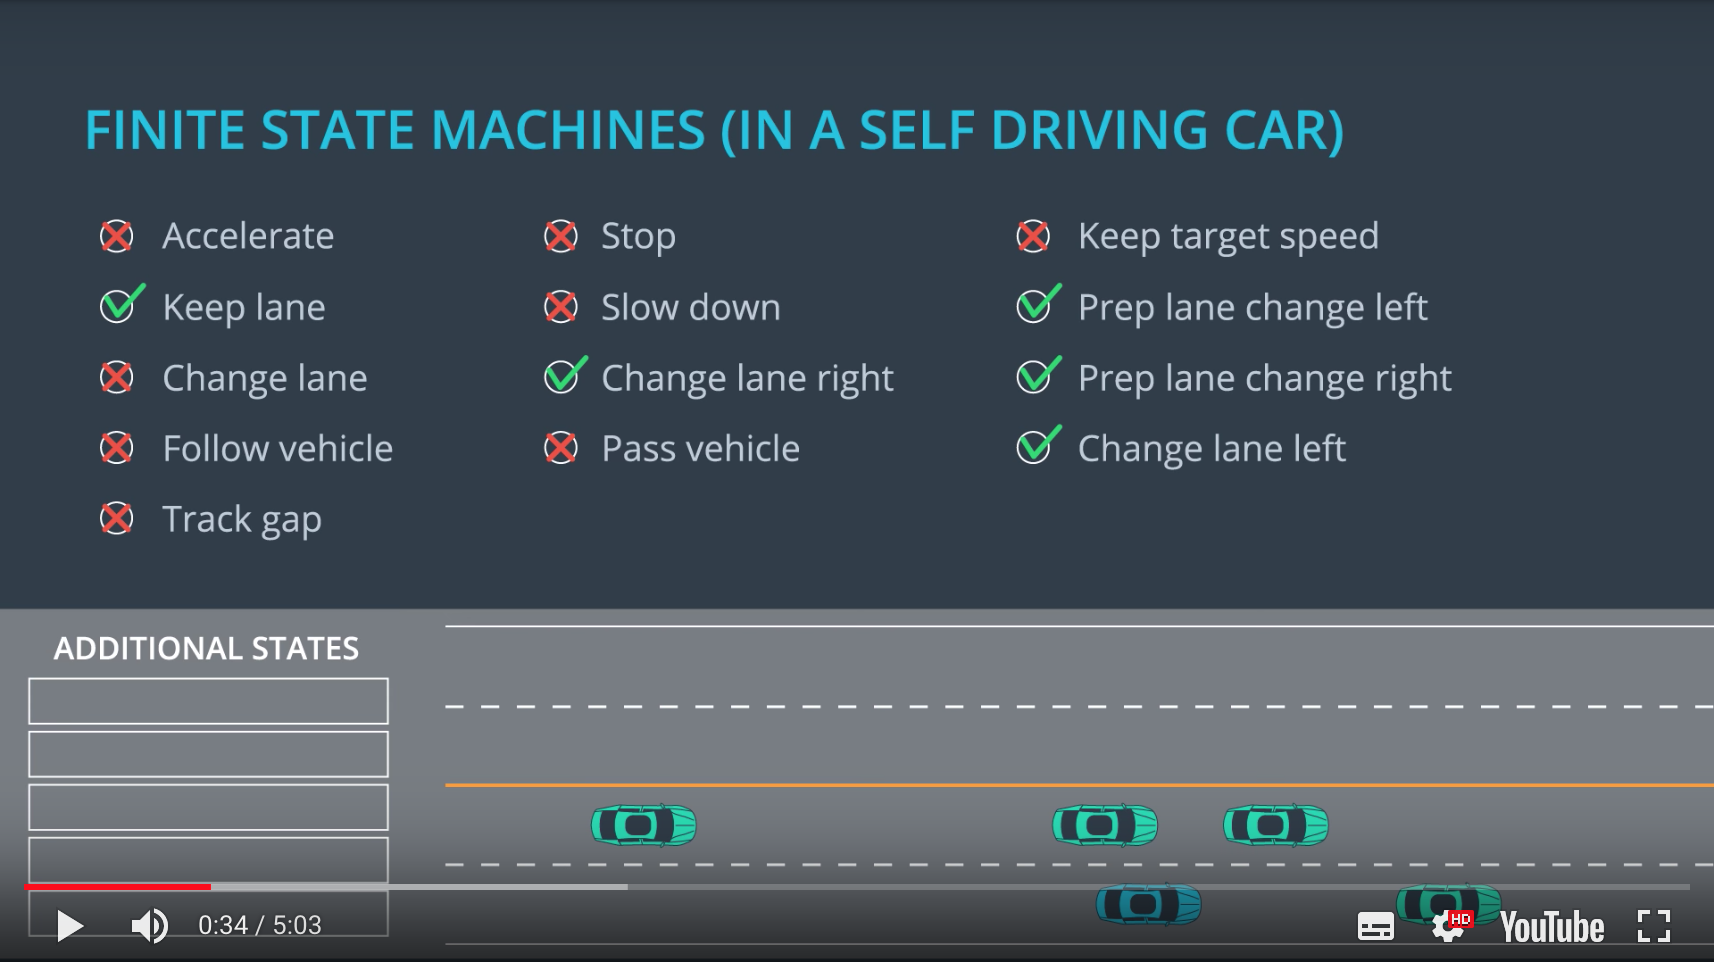

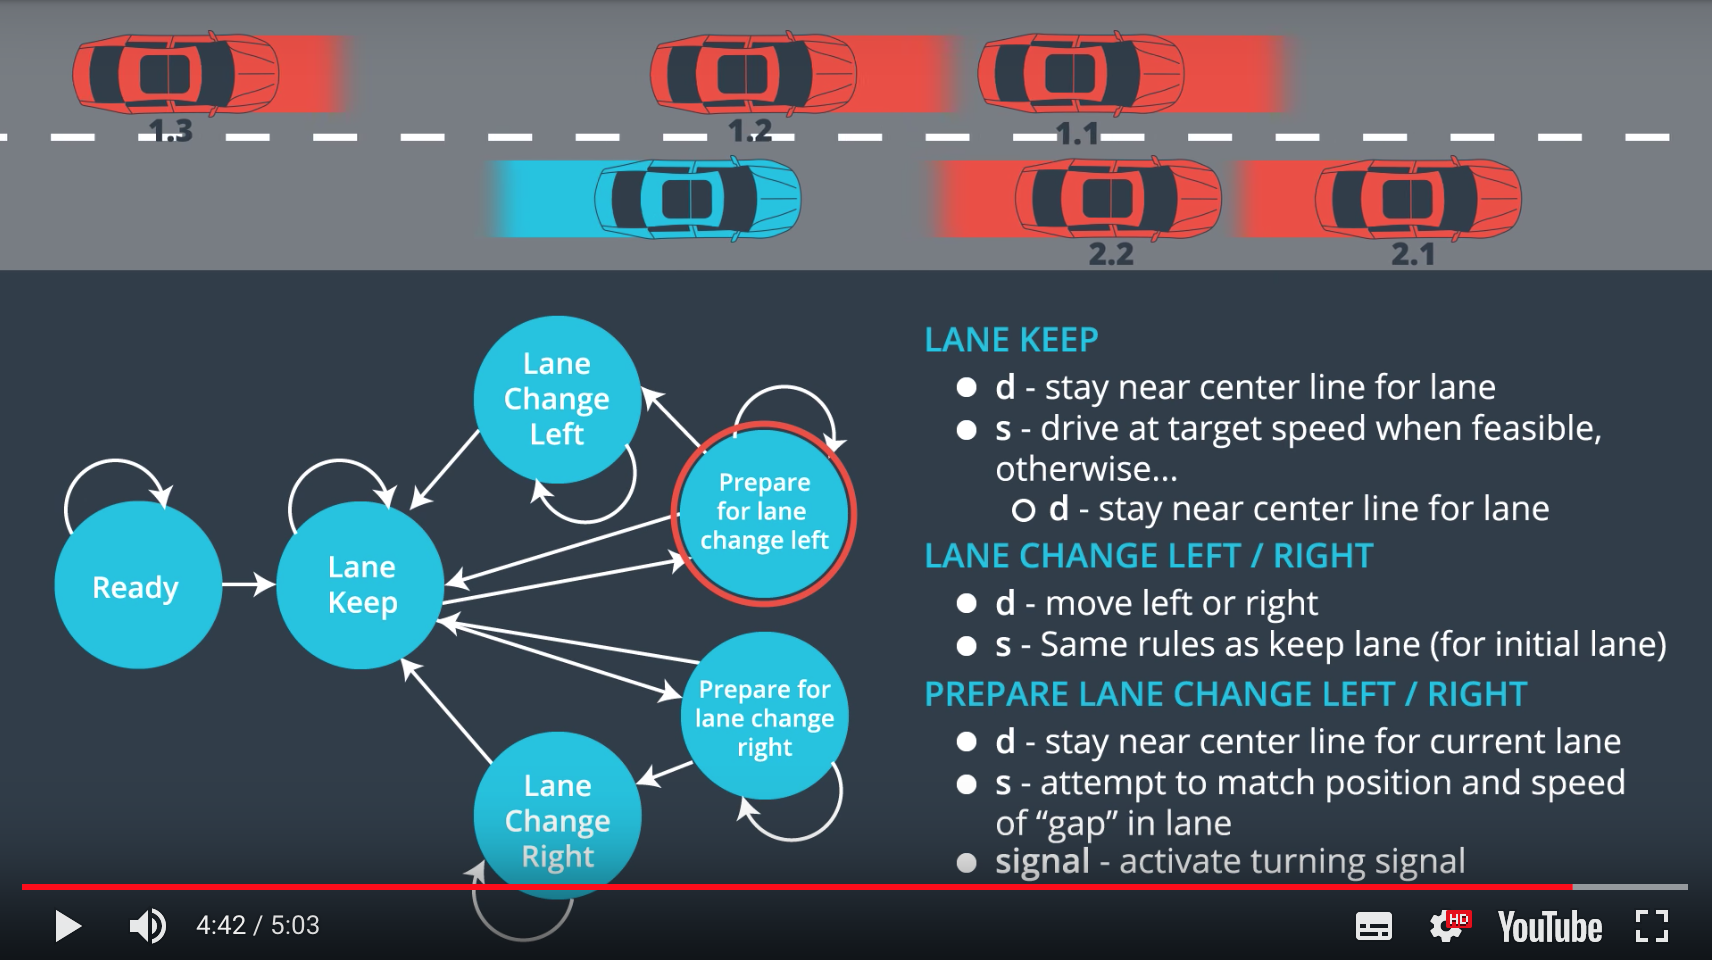

## 6. Behavior Planning Pseudocode

One way to implement a transition function is by generating rough trajectories for each accessible "next state" and then finding the best. To "find the best" we generally use **cost functions**. We can then figure out how costly each rough trajectory is and then select the state with the lowest cost trajectory.

We'll discuss this in more detail later, but first read carefully through the pseudocode below to get a better sense for how a transition function might work.

```python
def transition_function(predictions, current_fsm_state, current_pose, cost_functions, weights):
    # only consider states which can be reached from current FSM state.
    possible_successor_states = successor_states(current_fsm_state)

    # keep track of the total cost of each state.
    costs = []
    for state in possible_successor_states:
        # generate a rough idea of what trajectory we would
        # follow IF we chose this state.
        trajectory_for_state = generate_trajectory(state, current_pose, predictions)

        # calculate the "cost" associated with that trajectory.
        cost_for_state = 0
        for i in range(len(cost_functions)) :
            # apply each cost function to the generated trajectory
            cost_function = cost_functions[i]
            cost_for_cost_function = cost_function(trajectory_for_state, predictions)

            # multiply the cost by the associated weight
            weight = weights[i]
            cost_for_state += weight * cost_for_cost_function
         costs.append({'state' : state, 'cost' : cost_for_state})

    # Find the minimum cost state.
    best_next_state = None
    min_cost = 9999999
    for i in range(len(possible_successor_states)):
        state = possible_successor_states[i]
        cost  = costs[i]
        if cost < min_cost:
            min_cost = cost
            best_next_state = state 

    return best_next_state
```

Obviously we are glossing over some important details here. Namely: what **are** these cost functions and how do we create them? We'll talk about that next!

## 7. Cost Function - Speed Penalty

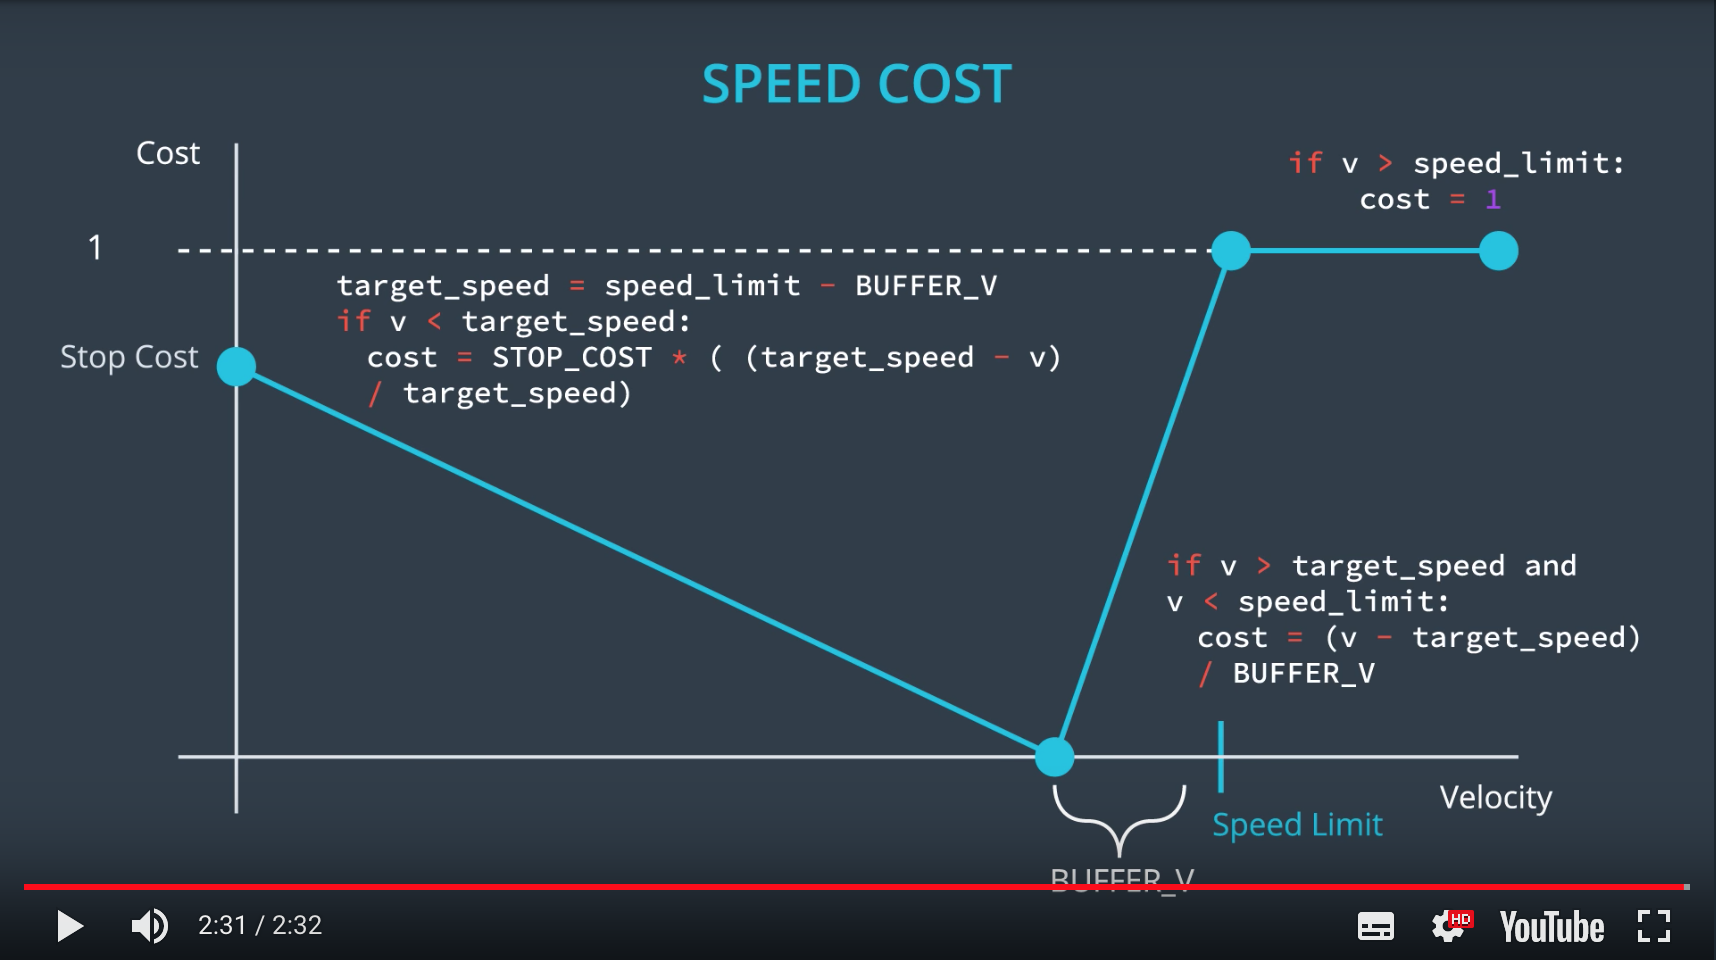

## 8. Cost Function - Lane Change Penalty

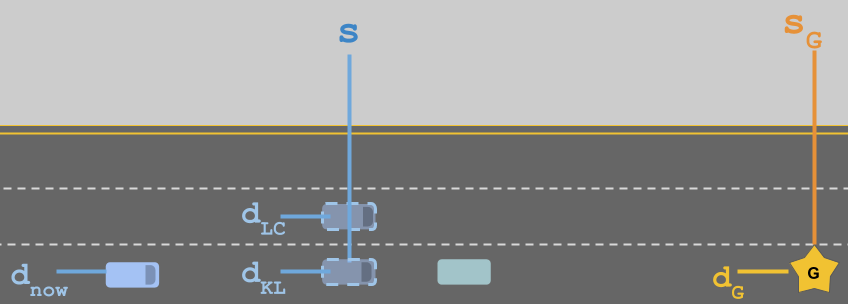

In the image above, the blue self driving car (bottom left) is trying to get to the goal (gold star). It's currently in the correct lane but the green car is going very slowly, so it considers whether it should perform a lane change (LC) or just keep lane (KL). These options are shown as lighter blue vehicles with a dashed outline.

If we want to design a cost function that deals with lane choice, it will be helpful to establish what the relevant variables are. In this case, we can define:

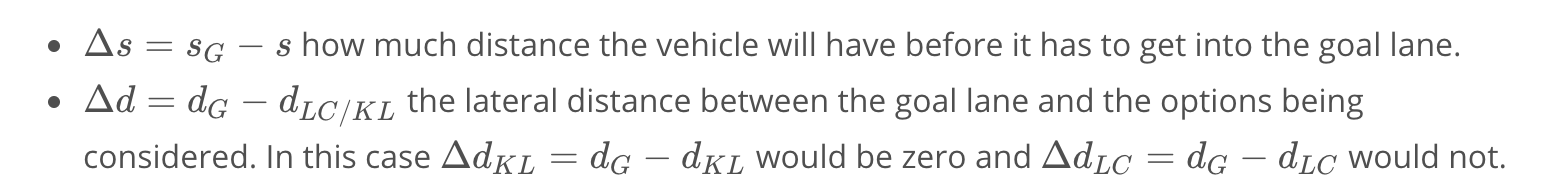

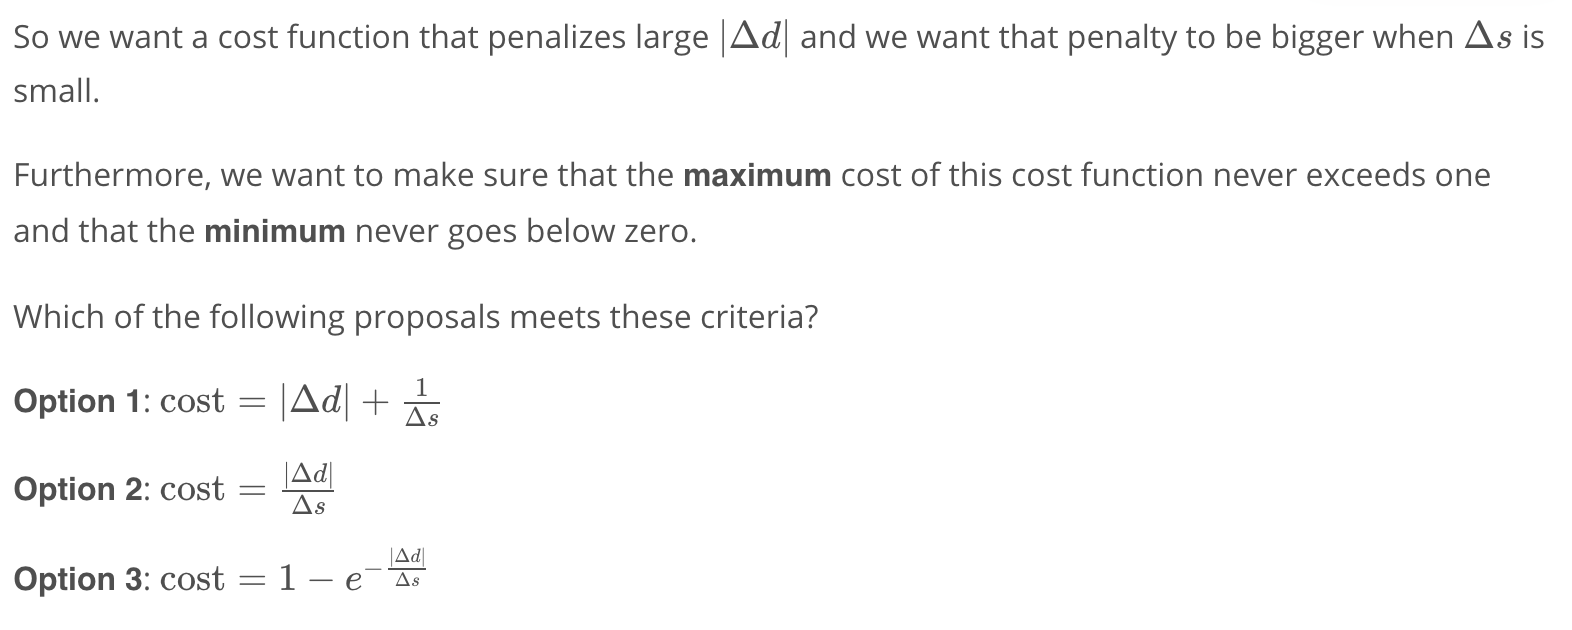

In this example, we found that the ratio ∣Δd∣/Δs was important. If we call that ratio xx we can then use that ratio in any function with bounded range. These functions tend to be useful when designing cost functions. These types of functions are called Sigmoid Functions. You can learn more in the [Wikipedia article](https://en.wikipedia.org/wiki/Sigmoid_function) if you're interested.

## 9. Implement a Cost Function in C++

In the previous quizzes, you designed a cost function to choose a lane when trying to reach a goal in highway driving:

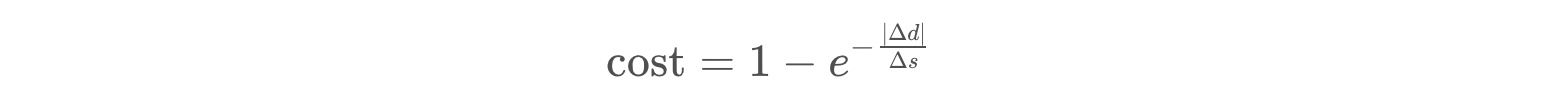

In this quiz, we'd like you to implement the cost function in C++, but with one important change. The finite state machine we use for vehicle behavior also includes states for planning a lane change right or left (PLCR or PLCL), and the cost function should incorporate this information. We will provide the following four inputs to the function:

* Intended lane: the intended lane for the given behavior. For PLCR, PLCL, LCR, and LCL, this would be the one lane over from the current lane.
* Final lane: the immediate resulting lane of the given behavior. For LCR and LCL, this would be one lane over.
* The Δs distance to the goal.
* The goal lane.

Your task in the implementation will be to modify ∣Δd∣ in the equation above so that it satisifes:

* ∣Δd∣ is smaller as both intended lane and final lane are closer to the goal lane.
* The cost function provides different costs for each possible behavior: KL, PLCR/PLCL, LCR/LCL.
* The values produced by the cost function are in the range 0 to 1.

You can implement your solution in `cost.cpp` below.

### Output
```
Costs for (intended_lane, final_lane, goal_distance):
---------------------------------------------------------
The cost is 0.981684 for (2, 2, 1.0)
The cost is 0.32968 for (2, 2, 10.0)
The cost is 0.0392106 for (2, 2, 100.0)
The cost is 0.0295545 for (1, 2, 100.0)
The cost is 0.0198013 for (1, 1, 100.0)
The cost is 0.00995017 for (0, 1, 100.0)
The cost is 0 for (0, 0, 100.0)
```

## 10. Implement a Second Cost Function in C++

In most situations, a single cost function will not be sufficient to produce complex vehicle behavior. In this quiz, we'd like you to implement one more cost function in C++. We will use these two C++ cost functions later in the lesson. The goal with this quiz is to create a cost function that would make the vehicle drive in the fastest possible lane, given several behavior options. We will provide the following four inputs to the function:

* Target speed: Currently set as 10 (unitless), the speed at which you would like the vehicle to travel.
* Intended lane: the intended lane for the given behavior. For PLCR, PLCL, LCR, and LCL, this would be the one lane over from the current lane.
* Final lane: the immediate resulting lane of the given behavior. For LCR and LCL, this would be one lane over.
* A vector of lane speeds, based on traffic in that lane: {6, 7, 8, 9}.

Your task in the implementation will be to create a cost function that satisifes:

* The cost decreases as both intended lane and final lane are higher speed lanes.
* The cost function provides different costs for each possible behavior: KL, PLCR/PLCL, LCR/LCL.
* The values produced by the cost function are in the range 0 to 1.

You can implement your solution in `cost.cpp` below.


## 11. Cost Function Design and Weight Tweaking

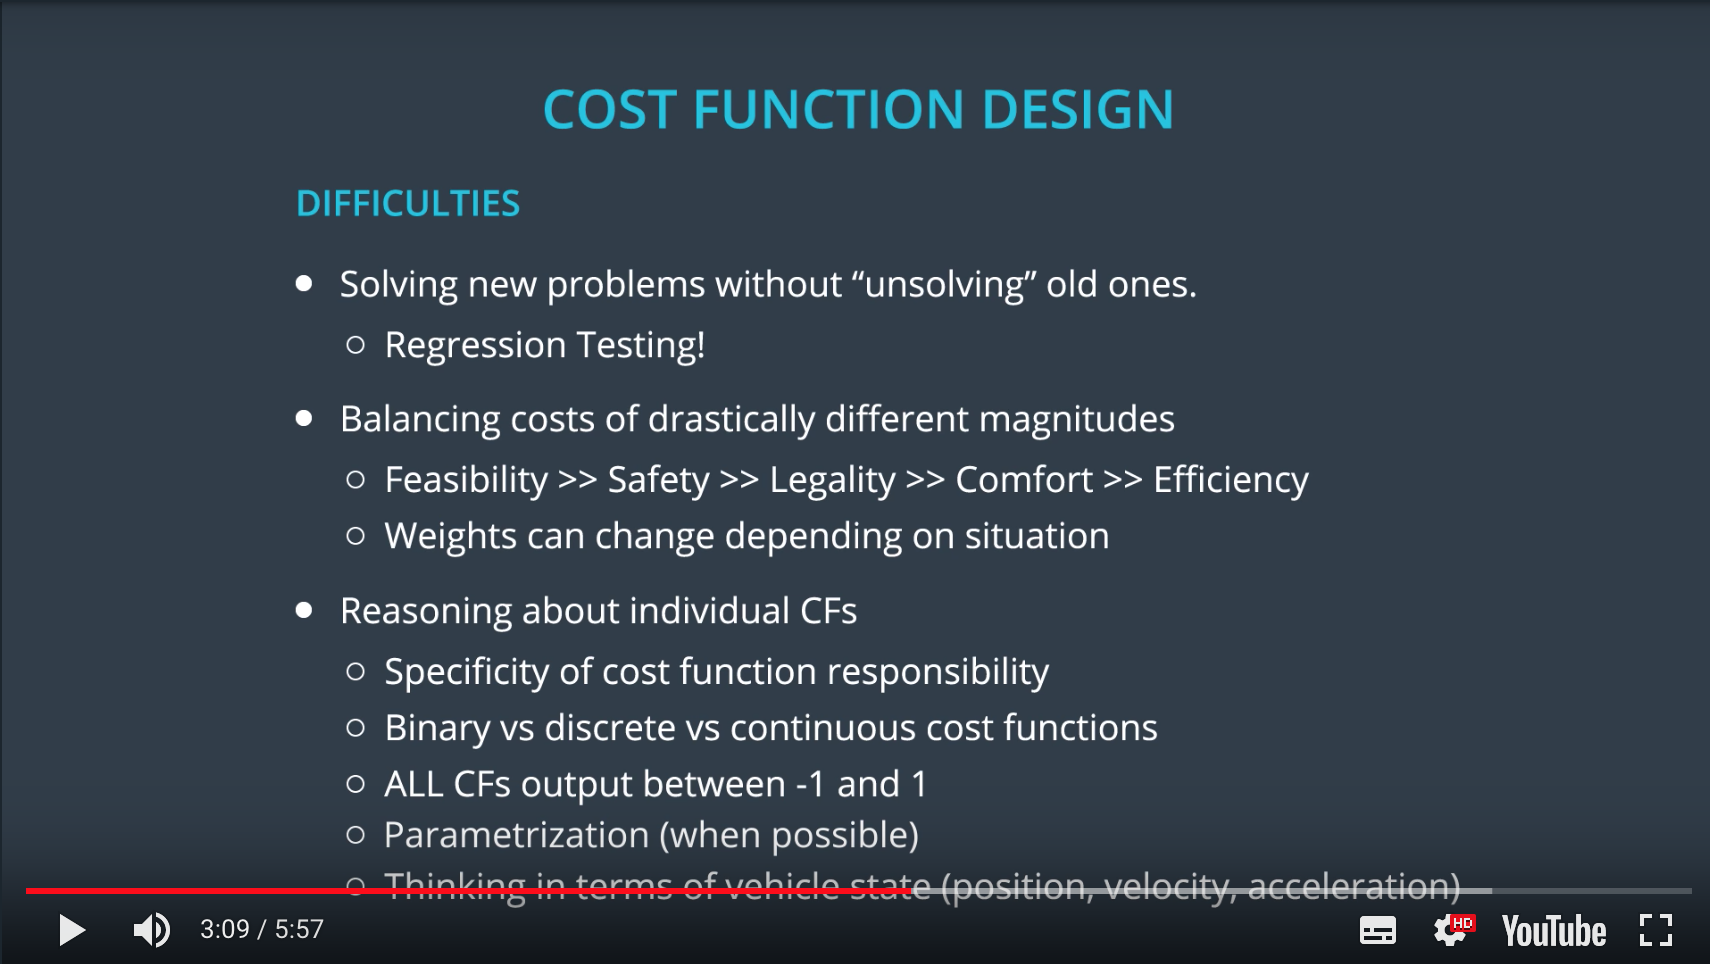

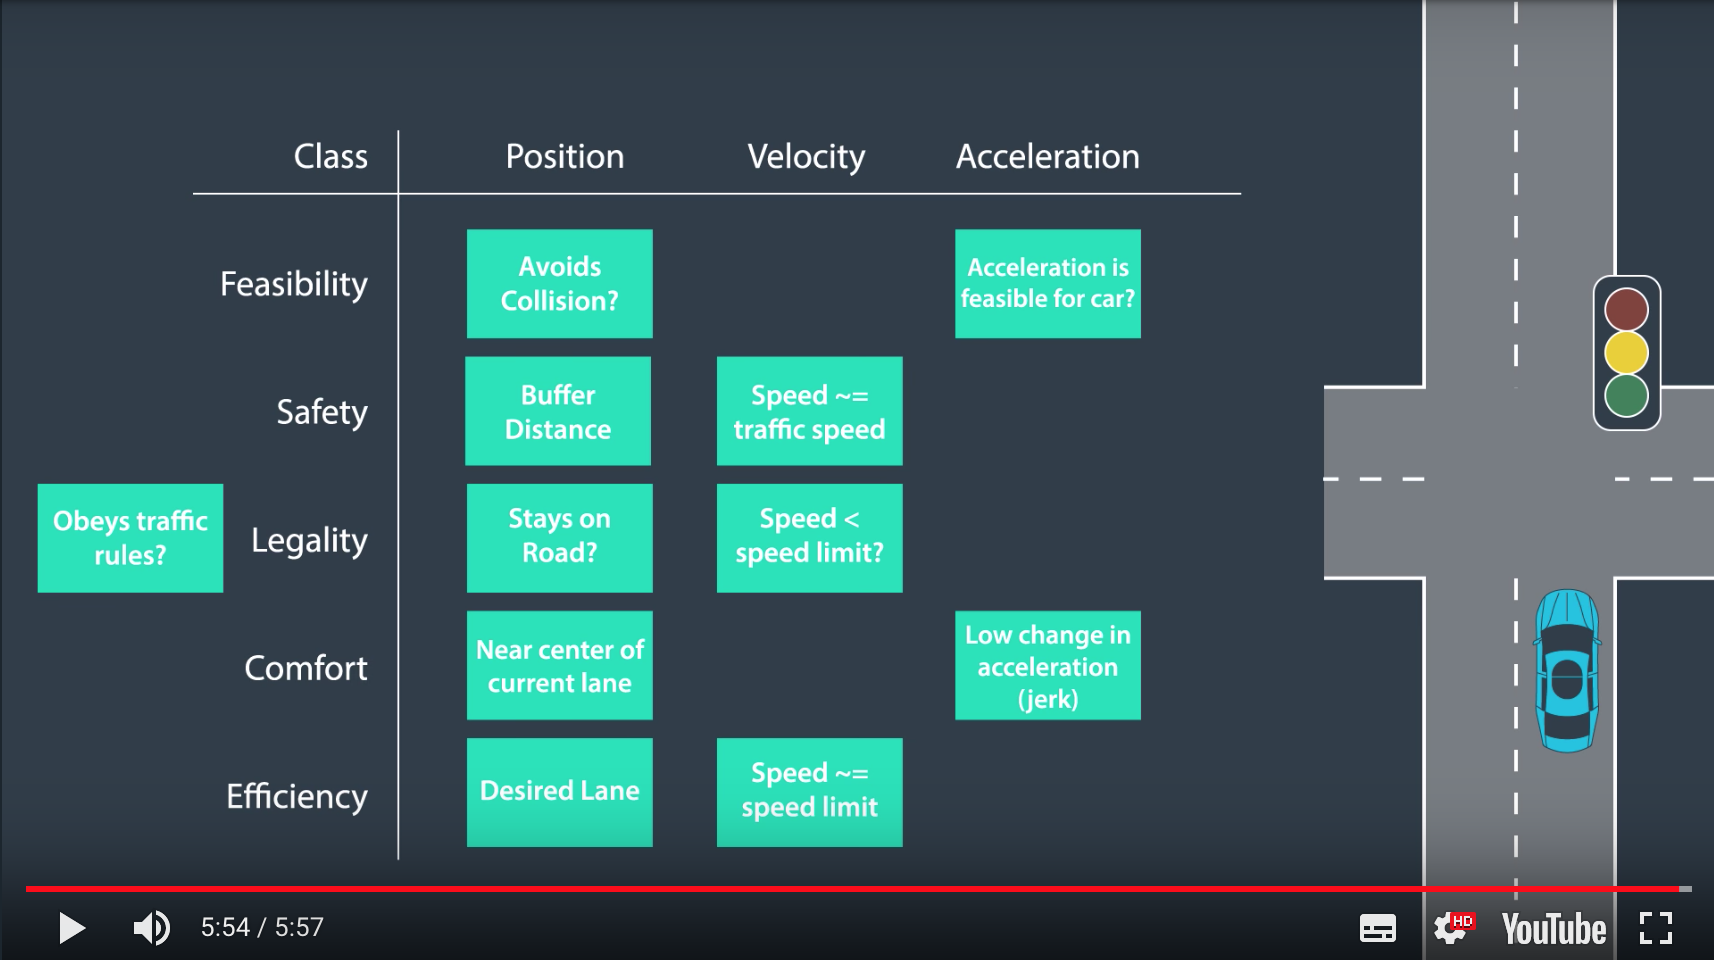

### Cost Function Matching

#### Cost Function 1

Penalizes trajectories that attempt to accelerate at a rate which is not possible for the vehicle.

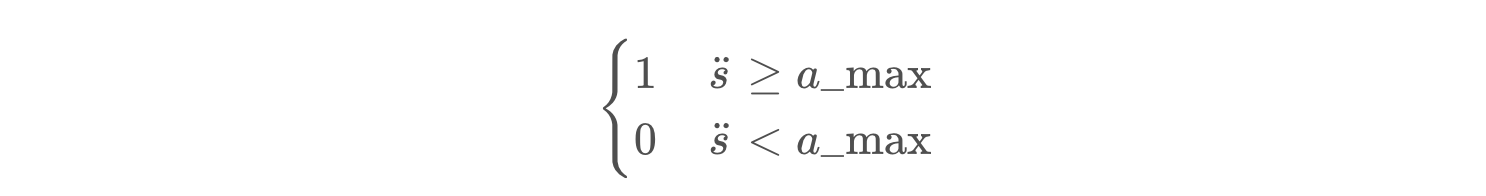

#### Cost Function 2

Penalizes trajectories that drive off the road.

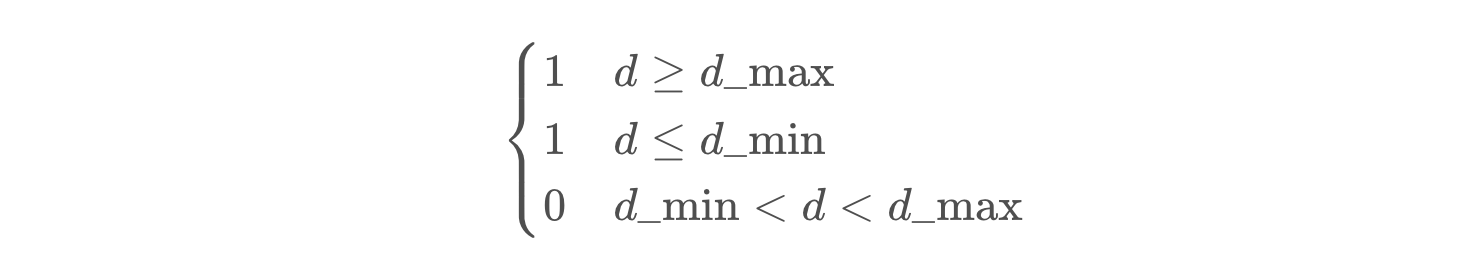

#### Cost Function 3

Penalizes trajectories that exceed the speed limit.

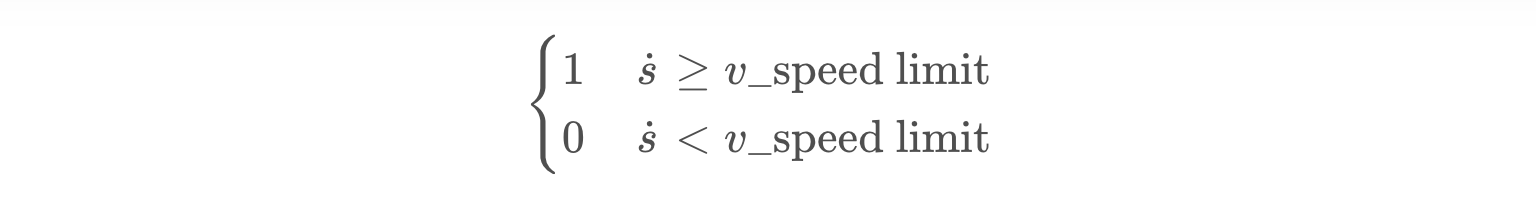

#### Cost Function 4

Penalizes trajectories that do not stay near the center of the lane.

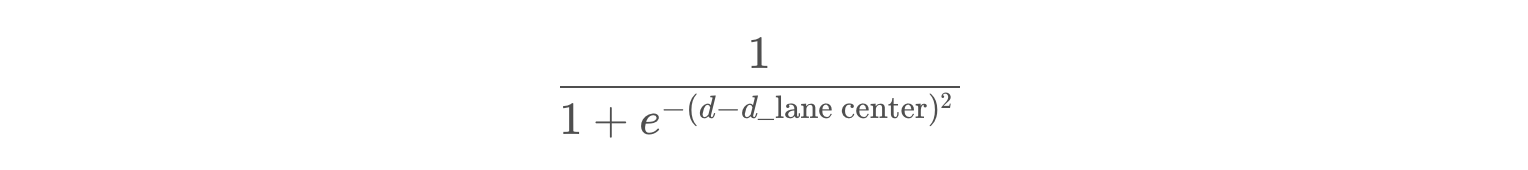

#### Cost Function 5

Rewards trajectories that stay near the target lane.

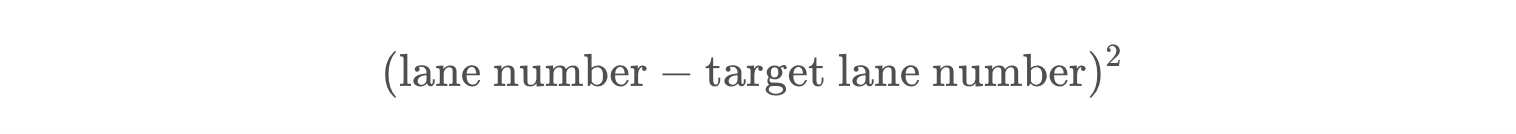


## 12. Scheduling Compute Time

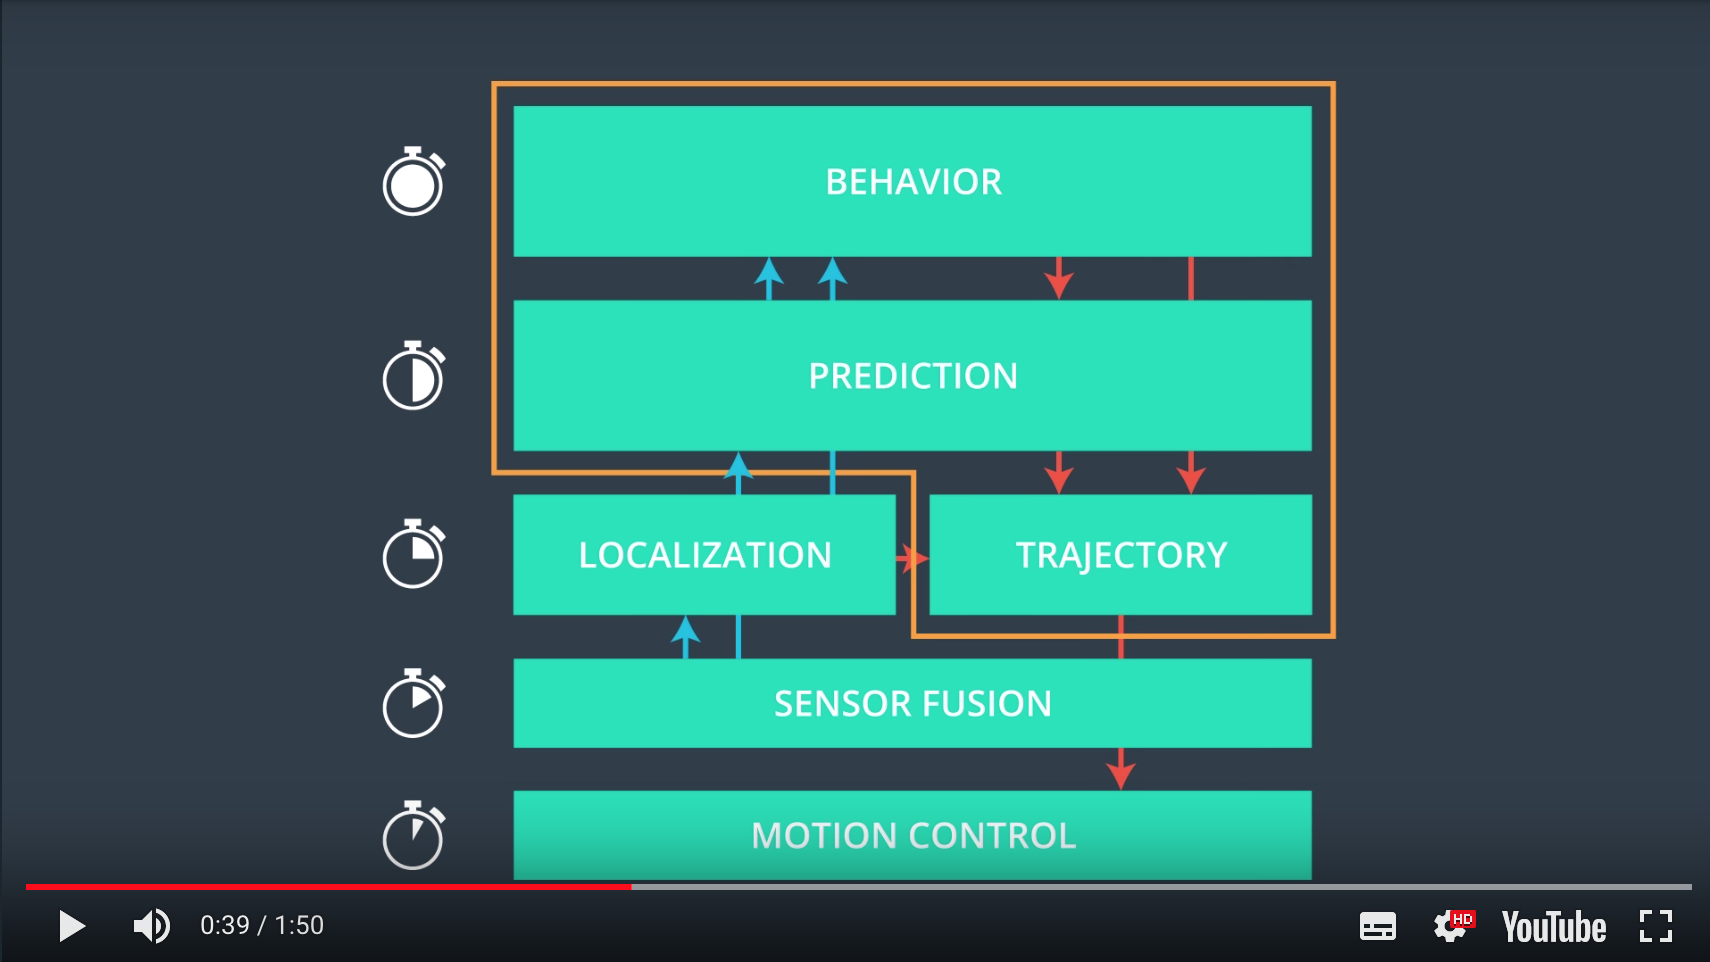

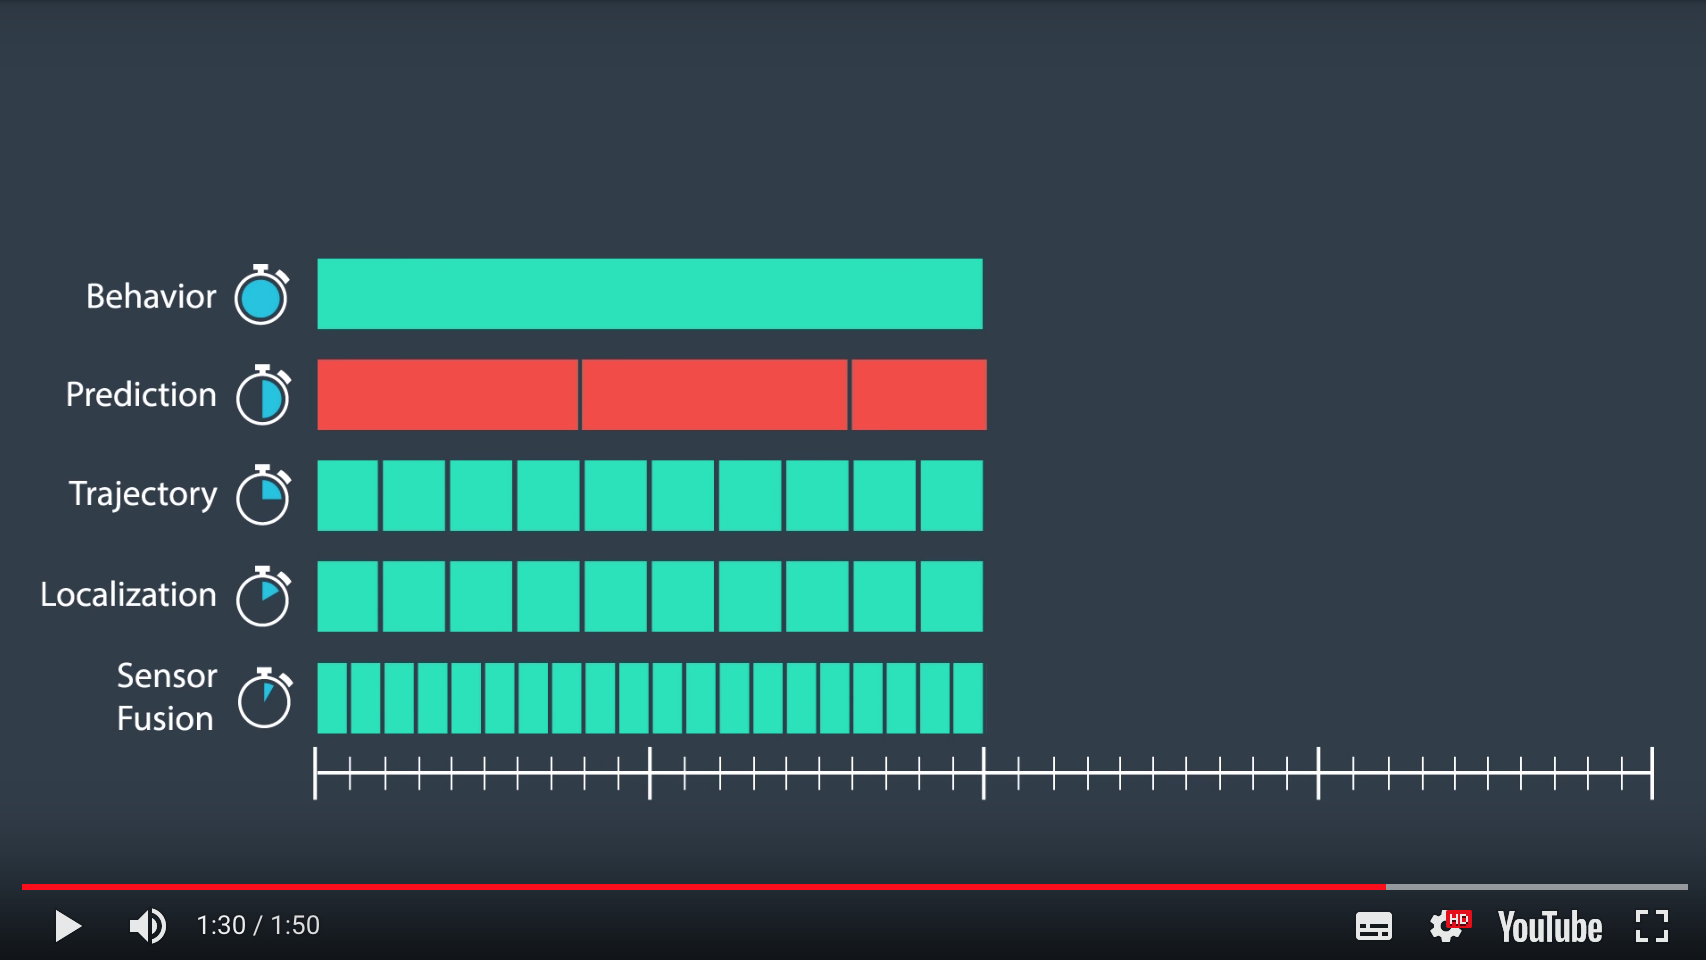

## 13. Implement Behavior Planner in C++

In this exercise you will implement a behavior planner and cost functions for highway driving. The planner will use prediction data to set the state of the ego vehicle to one of 5 values and generate a corresponding vehicle trajectory:

* `"KL"` - Keep Lane
* `"LCL"` / `"LCR"` - Lane Change Left / Lane Change Right
* `"PLCL"` / `"PLCR"` - Prepare Lane Change Left / Prepare Lane Change Right

The objective of the quiz is to navigate through traffic to the goal in as little time as possible. Note that the goal lane and s value, as well as the traffic speeds for each lane, are set in `main.cpp` below. Since the goal is in the slowest lane, in order to get the lowest time, you'll want to choose cost functions and weights to drive in faster lanes when appropriate. We've provided two suggested cost functions in `cost.cpp`.

### Instructions

#### 1. Implement the `choose_next_state` method in the `vehicle.cpp` class. 

You can use the [Behavior Planning Pseudocode concept](https://classroom.udacity.com/nanodegrees/nd013/parts/6047fe34-d93c-4f50-8336-b70ef10cb4b2/modules/27800789-bc8e-4adc-afe0-ec781e82ceae/lessons/56274ea4-277d-4d1e-bd95-ce5afbad64fd/concepts/e9f08f5f-0b8f-488d-8940-45bc474b4913) as a guideline for your implementation. In this quiz, there are a couple of small differences from that pseudocode: you'll be returning a best trajectory corresponding to the best state instead of the state itself. Additionally, the function inputs will be slightly different in this quiz than in the classroom concept. For this part of the quiz, we have provided several useful functions:

1. `successor_states()` - Uses the current state to return a vector of possible successor states for the finite state machine.
2. `generate_trajectory()` - Returns a vector of Vehicle objects representing a vehicle trajectory, given a state and predictions. Note that trajectory vectors might have size 0 if no possible trajectory exists for the state.
3. `calculate_cost()` - Included from `cost.cpp`, computes the cost for a trajectory.

#### 2. Choose appropriate weights for the cost functions in `cost.cpp` to induce the desired vehicle behavior. 

Two suggested cost functions have been implemented based on previous quizzes, but you are free to experiment with your own cost functions. The `get_helper_data()` function in `cost.cpp` provides some preprocessing of vehicle data that may be useful in your cost functions. See if you can get the vehicle to move into a fast lane for a portion of the track and then move back to reach the goal!

#### 3. Hit Test Run and see how your car does! How fast can you get to the goal?

### Extra Practice

Provided in one of the links below is a zip file `python_3_practice`, which is the same problem written in Python 3 - you can optionally use this file for additional coding practice. In the `python_3_solution link`, the solution is provided as well. If you get stuck on the quiz see if you can convert the python solution to C++ and pass the classroom quiz with it. You can run the python quiz with `python simulate_behavior.py`.